# Machine Learning Assignment 1 Report

In [8]:
""" Functions """

import matplotlib.pyplot as plt
import csv

kfold_scores = [[],[],[],[]]
test_adj_scores = [[],[],[],[]]
test_corr_scores = [[],[],[],[]]
test_cos_scores = [[],[],[],[]]
threshold_test_scores = [[],[],[],[]]

def read_scores(fname, arr, labels=["k", "score"], columns=['k', 'score', 'score_nw']):
    file = open(fname)
    dic = csv.DictReader(file, delimiter=',')
    for row in dic:
        arr[0].append(int(row[columns[0]]))
        arr[1].append(float(row[columns[1]]))
        arr[2].append(float(row[columns[2]]))
    arr[3] = labels
    file.close()

def graph(lines, labels):
    for x,y,label in lines: 
        plt.plot(x,y, label=label)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

read_scores("data/validation_results.csv", kfold_scores)
read_scores("data/test_results_adj.csv", test_adj_scores)
read_scores("data/test_results_cor.csv", test_corr_scores)
read_scores("data/test_results_cos.csv", test_cos_scores)
read_scores("data/threshold_test_scores.csv", threshold_test_scores, labels=["threshold", "score"], columns=["threshold","score","score_nw"])

## Part 1
 - Since I find it quite difficult to describe with words, I will be explainin it visually

### 1-a

![1nn](images/1nn.png)

<center>
$ 1nn(s_1) $ is <span style="color:red">red</span> circle, <br>
$ 1nn(s_2) $ is <span style="color:blue">blue</span> circle, <br>
$ 1nn(s_1 \cup s_2) $ is also <span style="color:blue">blue</span> circle <br>
</center>

### 1-b

![3nn.png](images/3nn.png)

<center>
$ 3nn(s_1) $ is <span style="color:red">red</span> circle, <br>
$ 3nn(s_2) $ is <span style="color:blue">blue</span> circle, <br>
$ 3nn(s_1 \cup s_2) $ is <span style="color:green">green</span> circle <br>
</center>

### 2-a

![graph2a](images/graph_2a.png)
 - _For training error to be minimum we need to give_ ____k=1____ _That way the model will learn (well, memorize) the data perfectly and the training error will be_ ___0___
 - _But training error is not really an estimation for the test set. For example with k being 1, training error will be 0. Lets assume we give a test data at point x. The data is is not within out predicted model even though we calculated our training error to be 0. So we can see that training error may not be same for the test set especially for this k._

### 2-b

![graph2b](images/graph_2b.png)

 - _Consider the graph above_
 - _Since our data is in two seperate group made out of ___n___ points each no matter what point we chose as "left out" the closest neighbors will be on the same group so long as_ $ k < n-1 $. _The moment k goes over n-1 we have to include the other group and that will increase the error rate since the current data point is in seperate group._
 - _Since suggested k value for cross validation is_ $ (number of points - 1) $ _and we have n-1 points in our group we can conclude that the optimal value for k is:_
 
 > $ k = (n-1)-1 $ <br>
 > _for n = 7 from graph_ <br>
 > $ k = (7-1)-1 = 5 $
 
 - Error rate for each group would be $ \frac{2}{7} $ since there is two different values for each group. Total that would make $\frac{4}{7}$ error rate for k=5
 

### 2-c
 - Using k that too high and too low has negative effects similar to those caused by _overfitting_ and _underfitting_
 - If the k is too large we reduce the variance of the data. That causes effects similar to _underfitting_ and overgeneralizes the data.
 - If the k is too small model literally memorizes the training data. That causes _overfitting_ issue and since there is no generalization at all the data we will test with model will more likely to give increased error.

### 2-d
![graph2d](images/graph_2d.png)
<center>
    <i>powered by paint</i>
</center>

## 3 (Linear Algebra)

### 3-a


### 3-b
 - Because of the ___Curse of Dimensionality___, that 200K dimension calculation is immensely expensive and resource intensive. If we were to use the __Gradient Descent__ however that would make it much more cheaper.<br>
 - On the other hand closed form solution has to calculate $ (X^{T} \times X)^{-1} $ with 200,000 data so that would take too long to calculate.

### 3-c
 - C seems absolutely true, I have no idea for the other ones

## Part 2

### What?
In this part I implemented a book recommendation system with KNN algorithm that does not recommend any book whatsoever. I used 3 different similarity functions and 2 different data parsing approach(one of which is kind of useless as it is) in this program. 

### How?
Idea is to parse given sample data, calculate similarities with user-based approach then make a prediction based on those.
Training and test data are parsed into either objects or matrices depending on the input.
These data then send into similarity function of choice to get K nearest neighbors.
Then using the neighbors a algorithm makes a prediction for books that given test users are already rated (for some reason) and using those predictions algorithm lastly calculates a score for accuracy (MAE)


### More on How
The predictions made with weighted and non-weighted algorithms. The weight distances are calculated similarities.
***
 - _The prediction for the weighted is_: 

> $ p_{u,i} =  \frac{\sum_{N}{(|S_{u,N}| \times R_{N,i})}}{\sum_{N}{(|S_{u,N}|)}} $

_For_ ___u___ _being the test user and_ ___i___ _being the current book_
***

 - _The prediction  for the non weighted is_:

> $ p_{u,i} =  \frac{\sum_{N}{(R_{N,i})}}{K} $

_For_ ___k___ _being the nearest neighbor count._

The weighted scores can be seen on the [next section](#Result_graphs)..

***

The similarity calculation can be done through the 3 algorithms:
 - Cosine similarity
 - Adjusted cosine similarity
 - Corelation based similarity
 
I have tested all three algorithms and saw that with weights ___cosine similarity___ gave the best result, somehow.<br>
If the weights are not involved then __adjusted cosine__ gives better result.<br>
Corelation is bad, just bad. <br>
My test results for weighted prediction with given test data with __k=3__ is:

|Algorithm|Weighted Test Score|Non-Weighted Test Score|
|-|-|-|
|Cosine similarity|0.9425077387242823|1.5122196307842366|
|Adjusted Cosine Similarity|1.1260244614342727|1.154978637348015|
|Corelation Based Similarity|1.9218153778123963|1.8493321453465965|


You can see all the test results with different k values on [next section.](#Result-graphs)

***

I also have two different data parse option which needs two seperate KNN algorithms. These KNNs use same math but different data.
Initally when I started the project I chose the obvious numpy way for KNN. But since the data is painfully sparse it took quite a bit of time to calculate everything it needed.
So, since I did not want to use 3rd party library like _scipy_, I decided to add another method using _objects_ and _dictionaries_. This way the data will stay dense and the calculations took ___40-80___ times shorter. Also the matrix method only uses _cosine similarity_ so the accuracy is way, ___way___ low.

|Method|Time(s)|Test Score|
|-|-|-|
|Matrix|~400|4.8|
|Object|5|1.3|

But I didn't remove the matrix method. I believe if I had time I also can optimize it to be even faster than dictionary method. But sadly I have other assignments to do.

***

There is also threshold value. Thresholds are added during prediction. When a book wasn't voted more than a certain amount instead of using books own rating algorithm uses __average of the books that user rated__ so it does not affect the end score.

All the threshold test are in the [next section](#Result-graphs).

***

I also added a k fold cross validation for the model. While the run time for the algorithm is low cross validation with different k-nn values takes a lot of time. <br>

|Algorithm run time(s)|Cross validation run time(s)|
|-|-|
|11|528|

For fold count ___10___ and k is between ____1____ and __20__

***

## Result graphs
### Validation
Here is the graph of the validation results for fold count __10__ and k between __1 and 20__ for adjusted cosine similarities.

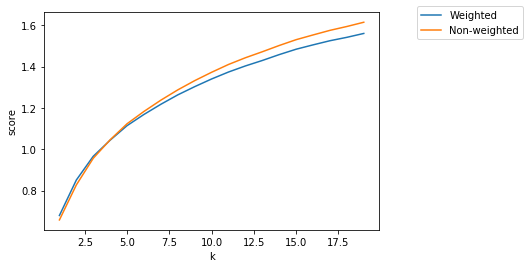

In [2]:
graph([(kfold_scores[0], kfold_scores[1], "Weighted"),(kfold_scores[0], kfold_scores[2], "Non-weighted")], kfold_scores[3])

***
### Test
Here is graph of the test scores of the each similarity algorithm for different ___k___ values.

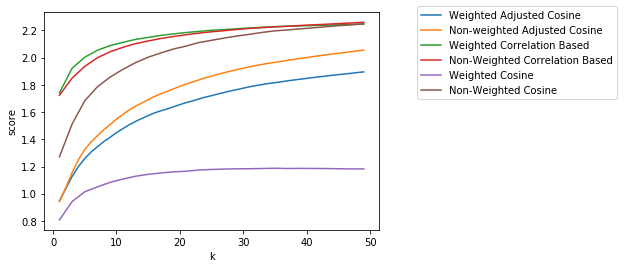

In [4]:
graph([(test_adj_scores[0], test_adj_scores[1], "Weighted Adjusted Cosine "),(test_adj_scores[0], test_adj_scores[2], "Non-weighted Adjusted Cosine"), (test_corr_scores[0], test_corr_scores[1], "Weighted Correlation Based"), (test_corr_scores[0], test_corr_scores[2], "Non-Weighted Correlation Based"), (test_cos_scores[0], test_cos_scores[1], "Weighted Cosine"), (test_cos_scores[0], test_cos_scores[2], "Non-Weighted Cosine")], test_adj_scores[3])

***

***
### Threshold
Here is the graph of different threshold values between __1 and 50__ with appropriate minimums on __k=2__.

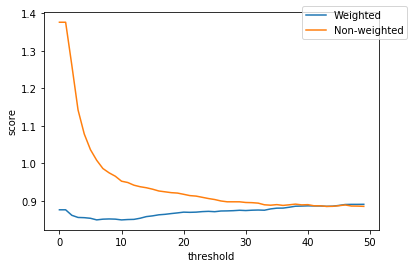

minimum score for weighted is 0.8489721167820274 for threshold 10
minimum score for non-weighted is 0.8850126785745948 for threshold 43


In [9]:
graph([(threshold_test_scores[0], threshold_test_scores[1], "Weighted"), (threshold_test_scores[0], threshold_test_scores[2], "Non-weighted")], threshold_test_scores[3])
min_score_ind = threshold_test_scores[1].index(min(threshold_test_scores[1]))
min_nw_ind = threshold_test_scores[2].index(min(threshold_test_scores[2]))
print("minimum score for weighted is {} for threshold {}".format(threshold_test_scores[1][min_score_ind], threshold_test_scores[0][min_score_ind]))
print("minimum score for non-weighted is {} for threshold {}".format(threshold_test_scores[2][min_nw_ind], threshold_test_scores[0][min_nw_ind]))